# --Title: Laptop Price Prediction--

# 1>>import dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import pickle
import missingno

### import dataset

In [2]:
laptop_dataset = pd.read_csv('/content/laptop_price.csv',encoding='latin-1')

In [3]:
laptop_dataset.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptop_dataset.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


# 2>>Exploratory_data_analysis

In [5]:
laptop_dataset.shape

(1303, 13)

In [6]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
#to find the data_types
laptop_dataset.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

<Axes: >

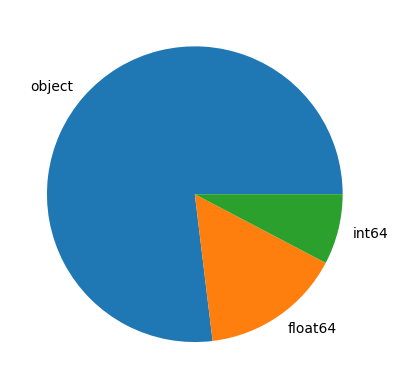

In [8]:
#to plot object, int, float
laptop_dataset.dtypes.value_counts().plot.pie()

In [9]:
#to print data_columns
laptop_dataset.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [10]:
#to find the duplicate data_point
laptop_dataset.duplicated().sum()

0

### find null_values

In [11]:
laptop_dataset.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## data show by graph

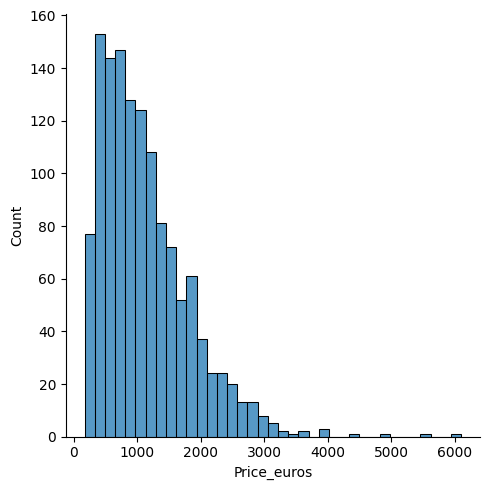

In [12]:
#to plot range of laptop price that which range of laptop are people buy most
sns.displot(laptop_dataset['Price_euros'])

<Axes: >

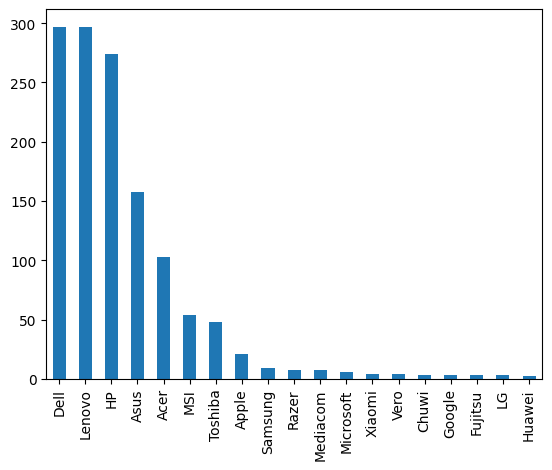

In [13]:
laptop_dataset['Company'].value_counts().plot(kind='bar')

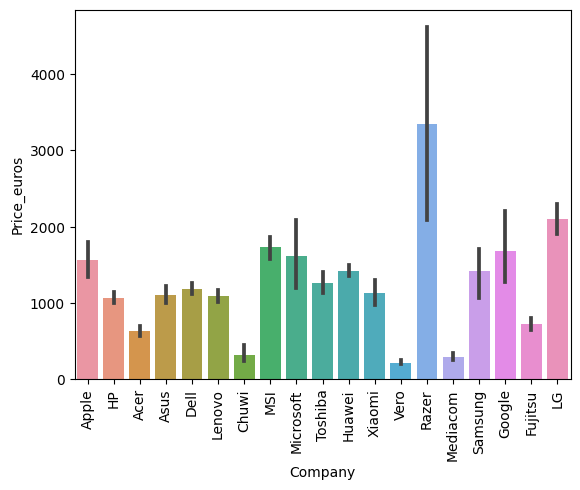

In [14]:
sns.barplot(x=laptop_dataset['Company'],y=laptop_dataset['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

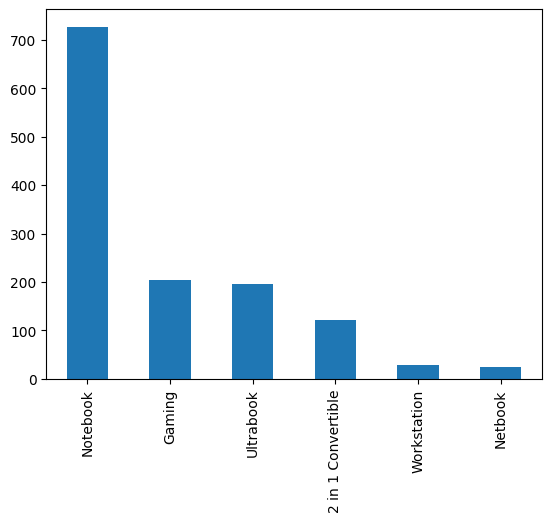

In [15]:
laptop_dataset['TypeName'].value_counts().plot(kind='bar')

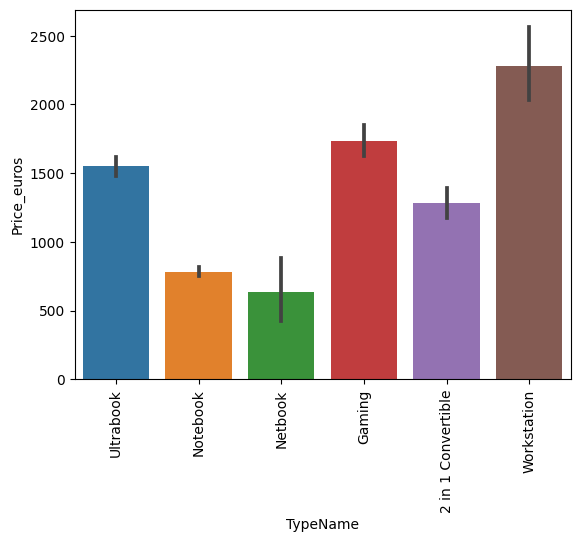

In [16]:
sns.barplot(x=laptop_dataset['TypeName'],y=laptop_dataset['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price_euros'>

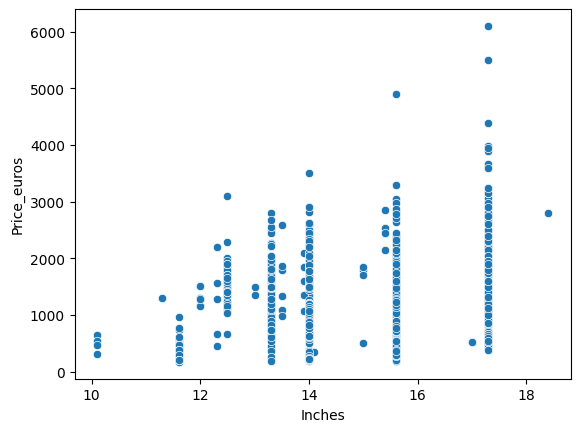

In [17]:
sns.scatterplot(x=laptop_dataset['Inches'],y=laptop_dataset['Price_euros'])

# 3>>Data pre-processing

### to drop the "ID" & "Product" column

In [18]:
#to drop the "laptop_ID" & "Product"
laptop_dataset = laptop_dataset.drop(columns=['laptop_ID','Product'],axis=0)

In [19]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### to delete "GB" and "kg" in Ram and weight coumns

In [20]:
laptop_dataset['Ram'] = laptop_dataset['Ram'].str.replace('GB','')
laptop_dataset['Weight'] = laptop_dataset['Weight'].str.replace('kg','')

In [21]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [22]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


### to convert Dtype of "Ram" into >int and "weigt" into >float

In [23]:
laptop_dataset['Ram'] = laptop_dataset['Ram'].astype('int32')
laptop_dataset['Weight'] = laptop_dataset['Weight'].astype('float32')

In [24]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# >>>feature engineering on "ScreenResolution" column>>>

### we will create new columm "Touchscreen" laptop having touchscreen=1 and non-touchscreen=0

In [25]:
laptop_dataset['Touchscreen'] = laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
laptop_dataset.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
132,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,884.0,0
342,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.10,716.0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.0,0
1077,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.78,2499.0,0
234,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.60,689.0,1


<Axes: >

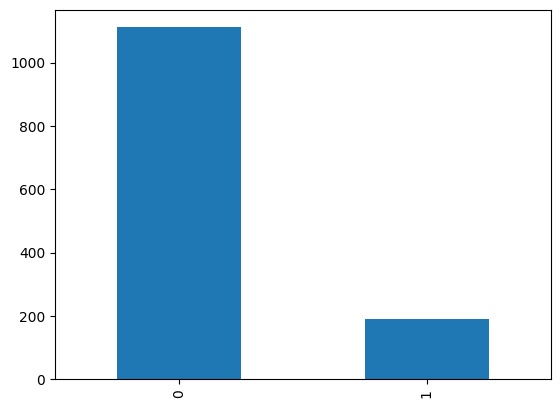

In [27]:
#value counts of touchscreen and non-touchscreen
laptop_dataset['Touchscreen'].value_counts().plot(kind='bar')
#>>non-touchscreen=0 & touchscreen=1

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

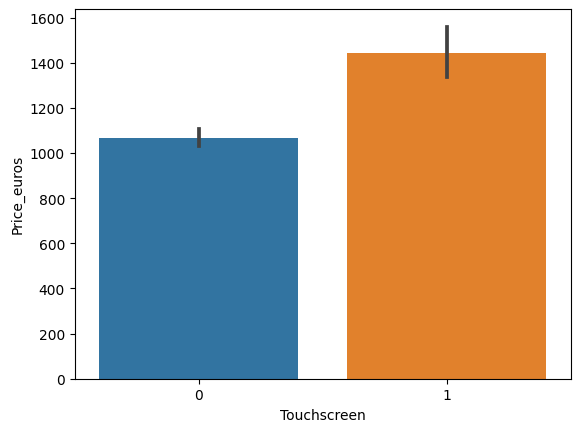

In [28]:
#to plot touchscreen and non-touchscreen laptop price
sns.barplot(x=laptop_dataset['Touchscreen'], y=laptop_dataset['Price_euros'])

### we will create new columm "IPS" laptop having IPS=1 and no IPS=0

In [29]:
laptop_dataset['IPS'] = laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<Axes: >

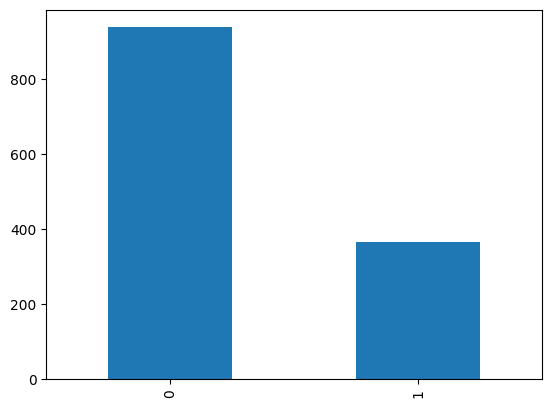

In [31]:
#to flot value count of IPS
laptop_dataset['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price_euros'>

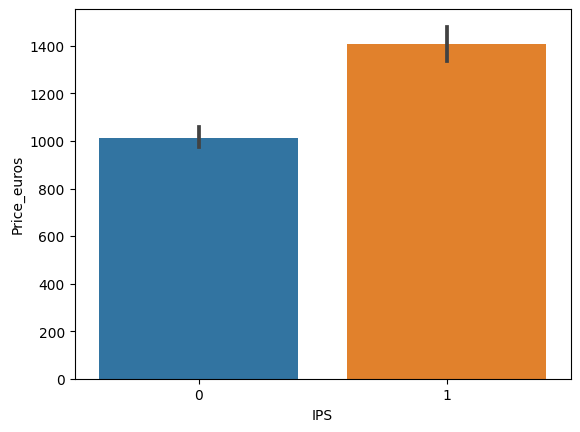

In [32]:
sns.barplot(x=laptop_dataset['IPS'], y=laptop_dataset['Price_euros'])
#IPS= 1 & no-IPS= 0

### we create 2 columns "X-resolution" & "Y-resolution"

In [33]:
new = laptop_dataset['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
laptop_dataset['X_res'] = new[0]
laptop_dataset['Y_res'] = new[1]

In [35]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [36]:
#this is regular expression we will split string from "X_res" column
laptop_dataset['X_res'] = laptop_dataset['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [38]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [39]:
#we will change the "X_res" and "Y_res" dtype into int32
laptop_dataset['X_res'] = laptop_dataset['X_res'].astype('int')
laptop_dataset['Y_res'] = laptop_dataset['Y_res'].astype('int')

In [40]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


### PPI column

PPI(pixel per inches)
we will create a column"PPI" in dataset which will be>>
√(X_res)^2 + (Y_res)^2 / inches

In [41]:
laptop_dataset['PPI'] = (((laptop_dataset['X_res']**2)+(laptop_dataset['Y_res']**2))**0.5/laptop_dataset['Inches']).astype('float')

In [42]:
#now we will drop "ScreenResolution" column now we don't need it
laptop_dataset.drop(columns=['ScreenResolution'],inplace=True)

In [43]:
laptop_dataset.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


### corelation in dataset

In [44]:
numerical_columns = laptop_dataset.select_dtypes(include=['int', 'float']).columns

In [45]:
correlation_matrix = laptop_dataset[numerical_columns].corr()['Price_euros']

In [46]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64


In [47]:
#now we will drop "X_res", "Y_res" and "inches" columns because we don't need it
laptop_dataset.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [48]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


# >>>feature engineering on "cpu" column<<<

In [49]:
laptop_dataset['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

### we will create new column "cpu name" and split "inte core ix" from "cpu" column

In [50]:
laptop_dataset['cpu name'] = laptop_dataset['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [51]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [52]:
'''We will create a function "processor"(txt) takes a string txt as input and processes it to identify the type of processor
based on certain conditions. Here's an explanation of how it works'''

#>>If the input txt is 'Intel Core i7', 'Intel Core i5', or 'Intel Core i3', it returns the same input string.
#>>If the input starts with 'Intel' but is not one of the specified models, it returns 'Other Intel Processor'.
#>>If the input is neither an Intel processor nor starts with 'Intel', it returns 'AMD Processor'.

def processor(txt):
    if txt == 'Intel Core i7' or txt == 'Intel Core i5' or txt == 'Intel Core i3':
        return txt
    else:
        if txt.split()[0] == 'Intel':
            return 'Other intel Processor'
        else:
            return 'AMD processor'

In [53]:
#we will create new column "cpu brand" apply above function
laptop_dataset['cpu brand'] = laptop_dataset['cpu name'].apply(processor)

In [54]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu name,cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

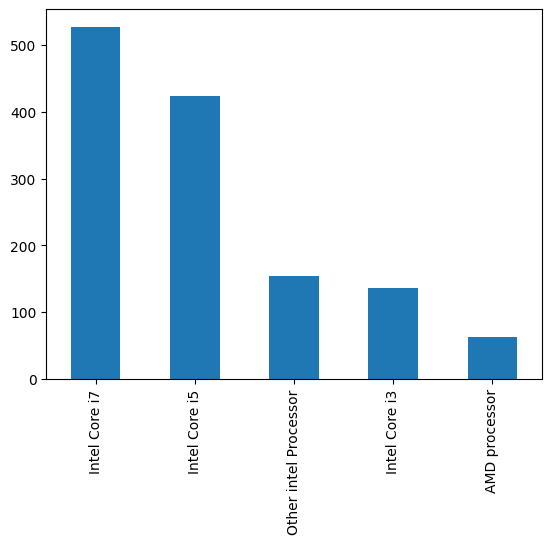

In [55]:
laptop_dataset['cpu brand'].value_counts().plot(kind='bar')

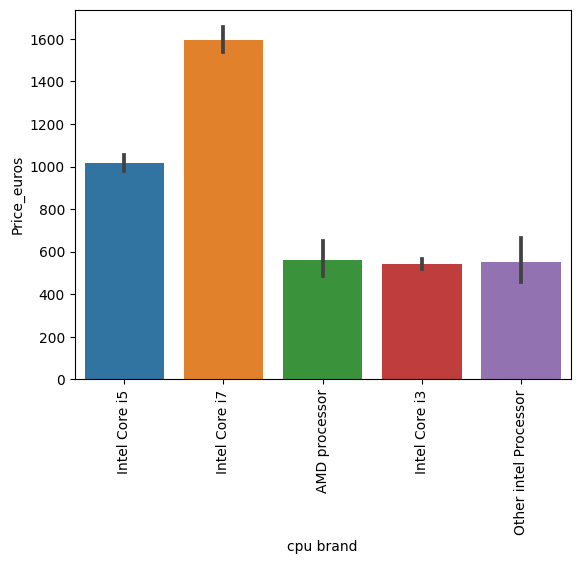

In [56]:
sns.barplot(x=laptop_dataset['cpu brand'],y=laptop_dataset['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
#now drop the 'cpu' and 'cpu name' in dataset
laptop_dataset.drop(columns=['Cpu','cpu name'],inplace=True)

In [58]:
laptop_dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


# >>>feature engineering on "Ram" column<<<

<Axes: >

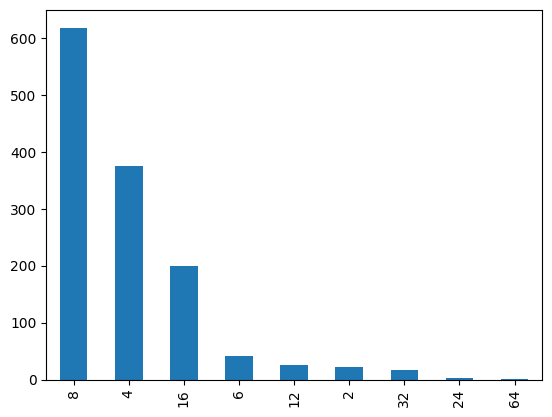

In [59]:
laptop_dataset['Ram'].value_counts().plot(kind='bar')

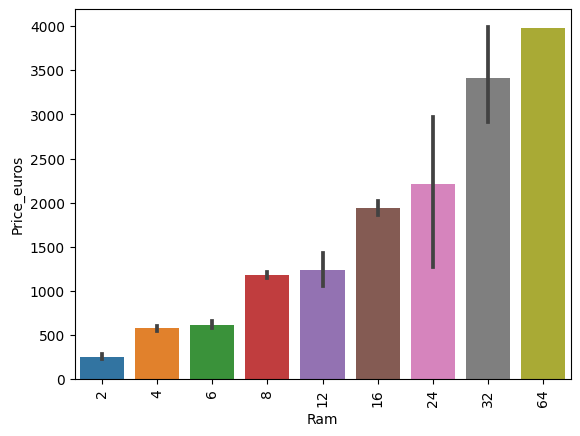

In [60]:
sns.barplot(x=laptop_dataset['Ram'],y=laptop_dataset['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

# >>>feature engineering on "Memory" column<<<

<Axes: >

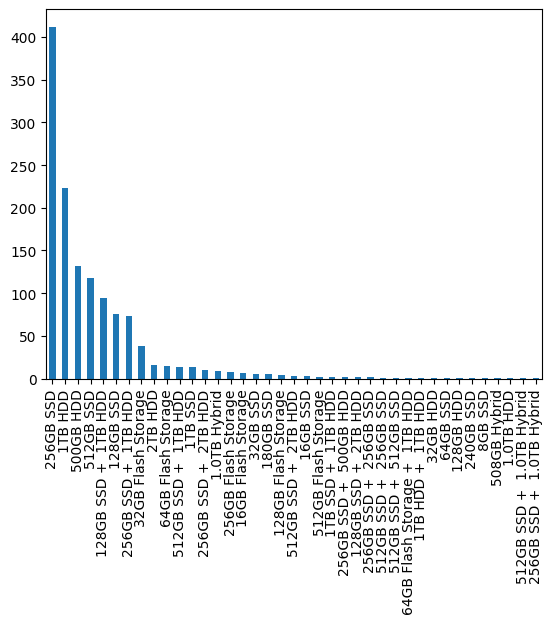

In [61]:
laptop_dataset['Memory'].value_counts().plot(kind='bar')

In [62]:
'''
by this code we will create 4 columns "SSD", "HDD", "Hybrid" and "Flash Storage"
example 1: laptop having 128(GB)SSD in "SSD" column will 128 and remaining columns(HDD,Hybrid and Flash Storage) is 0
example 2: laptop having 1000(GB)HDD in "HDD" column will 1000 and remaining columns(SSD,Hybrid and Flash Storage) is 0
example 3: laptop having both 1000(GB)HDD and 128(GB)SSD in "HDD" column will 1000 and in "SSD" column will be 128
           remaining columns(Hybrid and Flash Storage) is 0
'''


laptop_dataset['Memory'] = laptop_dataset['Memory'].astype(str).replace('\.0','',regex=True)
laptop_dataset['Memory'] = laptop_dataset['Memory'].str.replace('GB','')
laptop_dataset['Memory'] = laptop_dataset['Memory'].str.replace('TB','000')
new = laptop_dataset['Memory'].str.split('+',n = 1,expand = True)

laptop_dataset["first"] = new[0]
laptop_dataset['first'] = laptop_dataset['first'].str.strip()

laptop_dataset['second'] = new[1]

laptop_dataset['Layer1HDD'] = laptop_dataset['first'].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset['Layer1SSD'] = laptop_dataset['first'].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset['Layer1Hybrid'] = laptop_dataset['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset['Layer1Flash_Storage'] = laptop_dataset['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_dataset["first"] = laptop_dataset["first"].str.replace(r'\D','')
laptop_dataset['second'].fillna('0', inplace=True)

laptop_dataset['Layer2HDD'] = laptop_dataset['second'].apply(lambda x: 1 if 'HDD' in x else 0)
laptop_dataset['Layer2SSD'] = laptop_dataset['second'].apply(lambda x: 1 if 'SSD' in x else 0)
laptop_dataset['Layer2Hybrid'] = laptop_dataset['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
laptop_dataset['Layer2Flash_Storage'] = laptop_dataset['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

laptop_dataset['second'] = laptop_dataset['second'].str.replace(r'\D','')

laptop_dataset['first'] = laptop_dataset['first'].astype(int)
laptop_dataset['second'] = laptop_dataset['second'].astype('int32')

laptop_dataset['HDD']=(laptop_dataset['first']*laptop_dataset['Layer1HDD']+laptop_dataset['second']*laptop_dataset['Layer2HDD'])
laptop_dataset['SSD']=(laptop_dataset['first']*laptop_dataset['Layer1SSD']+laptop_dataset['second']*laptop_dataset['Layer2SSD'])
laptop_dataset['Hybrid']=(laptop_dataset['first']*laptop_dataset['Layer1Hybrid']+laptop_dataset['second']*laptop_dataset['Layer2Hybrid'])
laptop_dataset['Flash Storage']=(laptop_dataset['first']*laptop_dataset['Layer1Flash_Storage']+laptop_dataset['second']*laptop_dataset['Layer2Flash_Storage'])

laptop_dataset.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD',
                            'Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<ipython-input-62-d45d11dbf736>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_dataset["first"] = laptop_dataset["first"].str.replace(r'\D','')
<ipython-input-62-d45d11dbf736>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_dataset['second'] = laptop_dataset['second'].str.replace(r'\D','')


In [63]:
laptop_dataset.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu brand,HDD,SSD,Hybrid,Flash Storage
896,Dell,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62,929.00,0,0,141.211998,Intel Core i7,1000,0,0,0
448,MSI,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,1027.74,0,0,141.211998,Intel Core i5,0,256,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0,1,220.534624,Intel Core i7,0,0,0,256
676,Asus,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.10,1135.00,0,0,157.350512,Intel Core i5,0,256,0,0
1126,Lenovo,2 in 1 Convertible,4,64 Flash Storage,Intel HD Graphics 400,Windows 10,0.69,479.00,1,1,224.173809,Other intel Processor,0,0,0,64


In [64]:
#now delete the "Memory" column
laptop_dataset.drop(columns=['Memory'],inplace=True)

In [65]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [66]:
#let's find corelation
numerical_columns = laptop_dataset.select_dtypes(include=['int', 'float']).columns
correlation_matrix = laptop_dataset[numerical_columns].corr()['Price_euros']
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price_euros, dtype: float64


In [67]:
#we will drop the "Hybrid" and "Flash Storage" because corelation with these columns is very low
laptop_dataset.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [68]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


# >>>feature engineering on "Gpu" column<<<

In [69]:
laptop_dataset['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [70]:
#we will create new column "Gpu brand" and split first name of Gpu(intel,Nvidia and AMD) from "Gpu"
laptop_dataset['Gpu brand'] = laptop_dataset['Gpu'].apply(lambda x:x.split()[0])

In [71]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [72]:
laptop_dataset['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [73]:
'''
we will delete the rows where the value in the 'Gpu brand' column is 'ARM'. we will uses
boolean indexing to keep only those rows where the 'Gpu brand' is not equal to 'ARM'.
'''
laptop_dataset = laptop_dataset[laptop_dataset['Gpu brand'] != 'ARM']

In [74]:
laptop_dataset['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

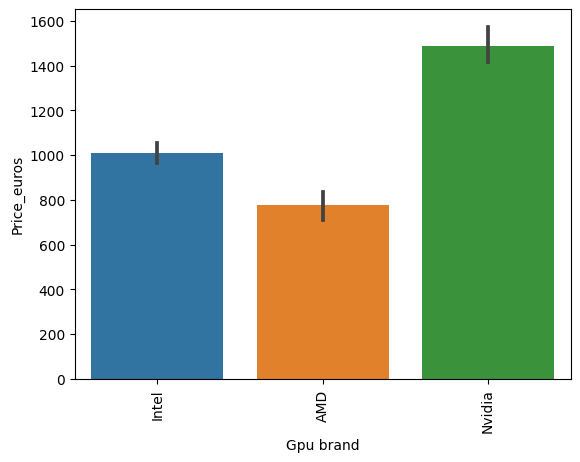

In [75]:
sns.barplot(x=laptop_dataset['Gpu brand'],y=laptop_dataset['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [76]:
#lets drop the 'Gpu' column
laptop_dataset.drop(columns=['Gpu'],inplace=True)

# >>>feature engineering on "OpSys(operating system)" column<<<

<Axes: >

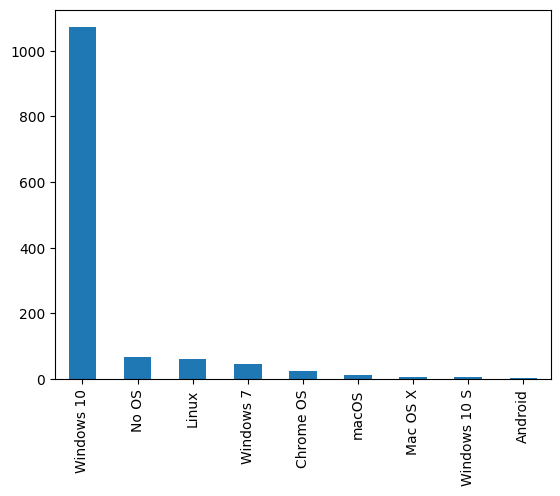

In [77]:
#OpSys
laptop_dataset['OpSys'].value_counts().plot.bar()

In [78]:
'''We will create a function "catagory"(inp) takes a string txt as input and processes it to identify the operating system'''

#>>If the input text is 'Windows 10', 'Windows 7', or 'Windows 10 s', it returns Windows.
#>>If the input text is 'MacOS', 'Mac OS X' it return Mac.
#>>If the input text is 'Linux', it return Linux.
#>>the reamining text will return 'Chrome OS/Android/No OS'

def catagory_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  elif inp == 'Linux':
    return 'Linux'
  else:
    return 'Chrome OS/Android/No OS'

In [79]:
#we will apply the above function
laptop_dataset['os'] = laptop_dataset['OpSys'].apply(catagory_os)

In [80]:
#drop the 'OpSys' column
laptop_dataset.drop(columns=['OpSys'],inplace=True)

In [81]:
laptop_dataset.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Chrome OS/Android/No OS
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: >

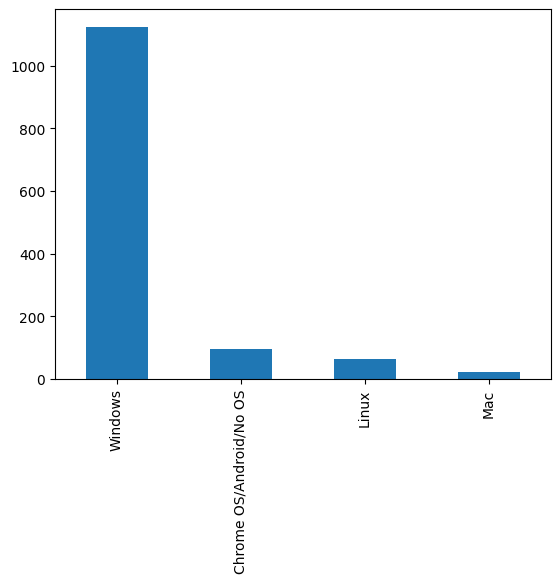

In [82]:
laptop_dataset['os'].value_counts().plot.bar()

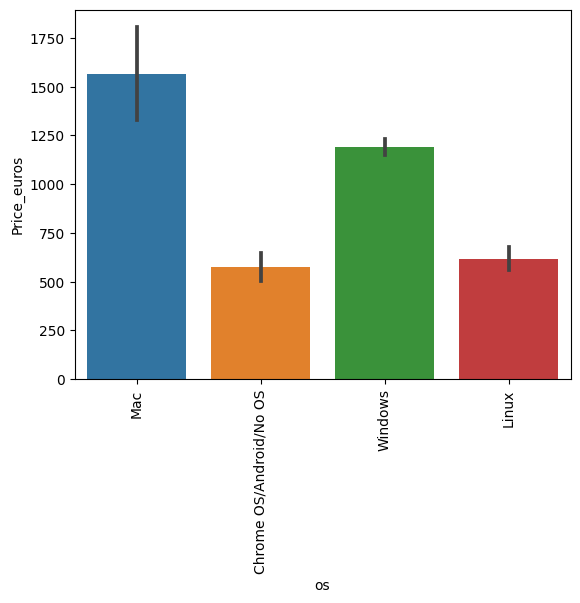

In [83]:
sns.barplot(x=laptop_dataset['os'],y=laptop_dataset['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Selection

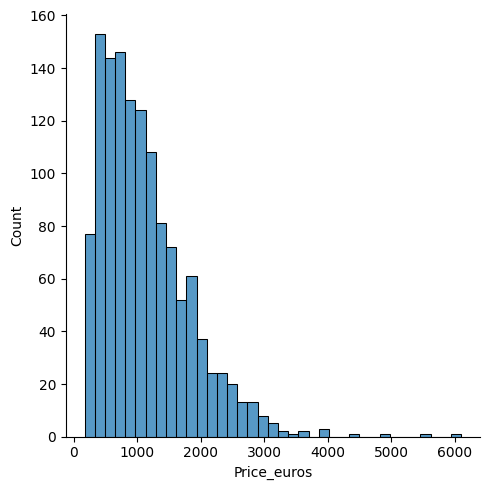

In [84]:
sns.displot(laptop_dataset['Price_euros'])

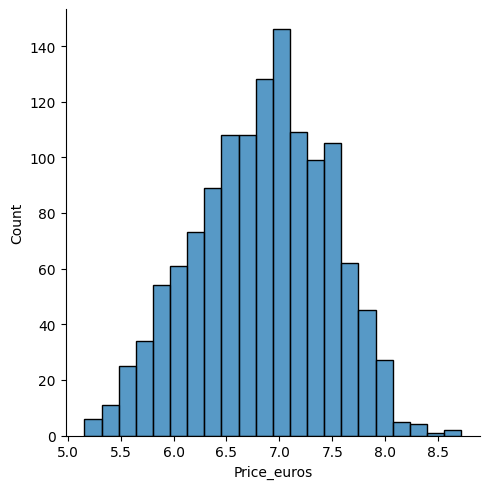

In [85]:
sns.displot(np.log(laptop_dataset['Price_euros']))

In [86]:
X = laptop_dataset.drop(columns=['Price_euros'])
Y = np.log(laptop_dataset['Price_euros'])

In [87]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Chrome OS/Android/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [88]:
Y.head()

0    7.200194
1    6.801216
2    6.354370
3    7.838915
4    7.497540
Name: Price_euros, dtype: float64

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8857762121150939
MAE 0.16118513358783243
